![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [52]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('BBDD_Hospitalización_sobremuestreo.csv')
df1

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,TIPO_CULTIVO_HEMOCULTIVO,TIPO_CULTIVO_HEMOCULTIVO Y UROCULTIVO,...,BIOPSIA_ADENOCARCINOMA GLEASON 10,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 8,BIOPSIA_ADENOCARCINOMA GLEASON 9,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_NEG,BIOPSIA_PROSTATITIS,HOSPITALIZACION
0,53.0,0.0,0.0,4.0,0.0,1.0,12.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
1,56.0,0.0,0.0,7.7,0.0,1.0,12.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
2,57.0,0.0,0.0,29.0,1.0,1.0,24.0,0.0,1,0,...,0,0,0,0,0,0,0,1,0,1.0
3,56.0,0.0,0.0,7.0,0.0,1.0,12.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
4,55.0,0.0,0.0,29.0,1.0,1.0,24.0,0.0,1,0,...,0,0,0,0,0,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,55.0,1.0,1.0,4.0,0.0,1.0,12.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
1084,69.0,0.0,0.0,6.0,0.0,0.0,12.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
1085,68.0,0.0,0.0,6.2,0.0,1.0,12.0,0.0,0,1,...,0,0,0,0,0,0,0,1,0,1.0
1086,65.0,0.0,0.0,4.3,0.0,0.0,12.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1.0


In [53]:
df1["HOSPITALIZACION"]=df1["HOSPITALIZACION"].fillna(df1["HOSPITALIZACION"].median())

In [54]:
df1.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'TIPO_CULTIVO_HEMOCULTIVO',
       'TIPO_CULTIVO_HEMOCULTIVO Y UROCULTIVO', 'TIPO_CULTIVO_NO',
       'TIPO_CULTIVO_UROCULTIVO', 'AGENTE_AISLADO_E.COLI', 'AGENTE_AISLADO_NO',
       'AGENTE_AISLADO_PSEUDOMONAS AERUGINOSA',
       'PATRON_RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R',
       'PATRON_RESISTENCIA_MULTI SENSIBLE', 'PATRON_RESISTENCIA_NO',
       'PATRON_RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA',
       'PATRON_RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA',
       'ANTIBIOTICO_PROFILAXIS_CEFALOSPORINA_AMINOGLUCOCIDO',
       'ANTIBIOTICO_PROFILAXIS_FLUOROQUINOLONA_AMINOGLICOSIDO',
       'ANTIBIOTICO_PROFILAXIS_OROQUINOLONAS', 'ANTIBIOTICO_PROFILAXIS_OTROS',
       'BIOPSIA_ADENOCARCINOMA GLEASON 10', 'BIOPSIA_ADENOCARCINOMA GLEASON 6',
       'BIOPSIA_ADENOCARCINOM

df1.info()

Separen el dataset en X, y (variable objetivo)

In [55]:
X=df1.loc[:,df1.columns!="HOSPITALIZACION"]
y=df1.iloc[:,8]

Separen el dataset en X_train, X_test, y_train y y_test

In [56]:
from sklearn.model_selection import train_test_split
#X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.25, random_state=0,stratify=y)

In [57]:
y_Train.value_counts()

TIPO_CULTIVO_HEMOCULTIVO
0    782
1     34
Name: count, dtype: int64

In [58]:
y_Test.value_counts()

TIPO_CULTIVO_HEMOCULTIVO
0    261
1     11
Name: count, dtype: int64

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [59]:
#importar el arbol de desicion
from sklearn.tree import DecisionTreeClassifier
#llamar a la funcion arbol
arbol= DecisionTreeClassifier(max_depth = 4, random_state = 42, class_weight={0:1,1:22})
#arbol= DecisionTreeClassifier(max_depth = 4, random_state = 42)

In [60]:
#entrenar el modelo con los parametros en train
arbol_hospital=arbol.fit(X_Train,y_Train)

In [61]:
#predecir la y con los valores del X_test
y_predict=arbol.predict(X_Test)

[Text(0.5, 0.75, 'x[8] <= 0.5\ngini = 0.5\nsamples = 816\nvalue = [782, 748]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 782\nvalue = [782, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 748]')]

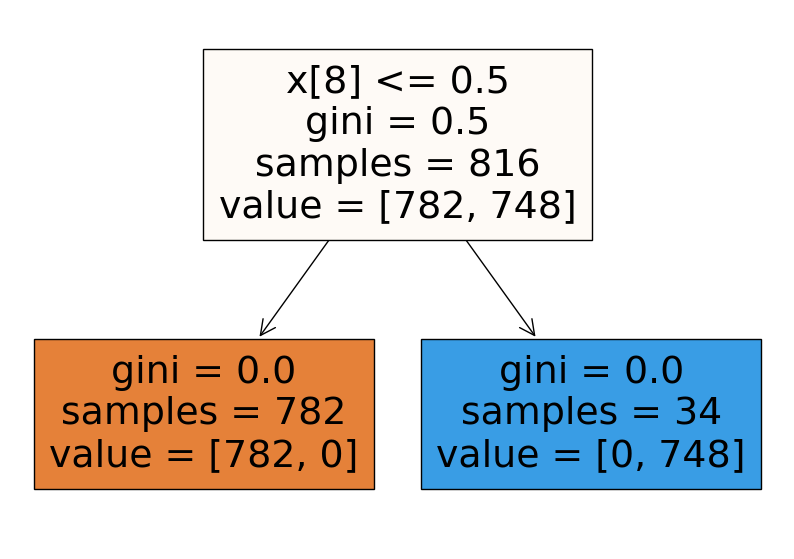

In [62]:
#graficar el arbol 
from sklearn import tree
import matplotlib.pyplot as plt
print()
plt.figure(figsize = (10,7))
#tree.plot_tree(arbol_hospital, feature_names=list(X.columns.values), filled=True)
tree.plot_tree(arbol_hospital, filled=True)

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

In [37]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
matriz_confusion=confusion_matrix(y_Test,y_predict)
matriz_confusion


array([[261,   0],
       [  0,  11]], dtype=int64)

In [38]:
print('Exactitud en el set de entrenamiento: {0: .2f}'.format(arbol.score(X_Train, y_Train)))
print('Exactitud en el set de testeo: {0: .2f}'.format(arbol.score(X_Test, y_Test)))

Exactitud en el set de entrenamiento:  1.00
Exactitud en el set de testeo:  1.00


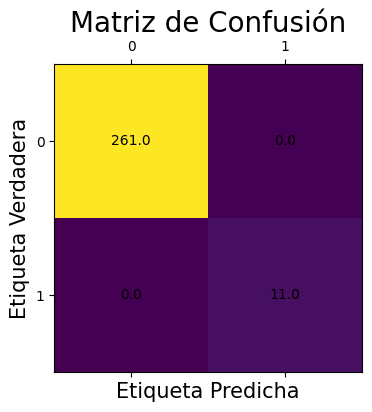

In [39]:
fig, ax = plt.subplots(figsize=(6,4))
ax.matshow(matriz_confusion)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(matriz_confusion):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [41]:
print(classification_report(y_Test, y_predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00        11

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272



Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

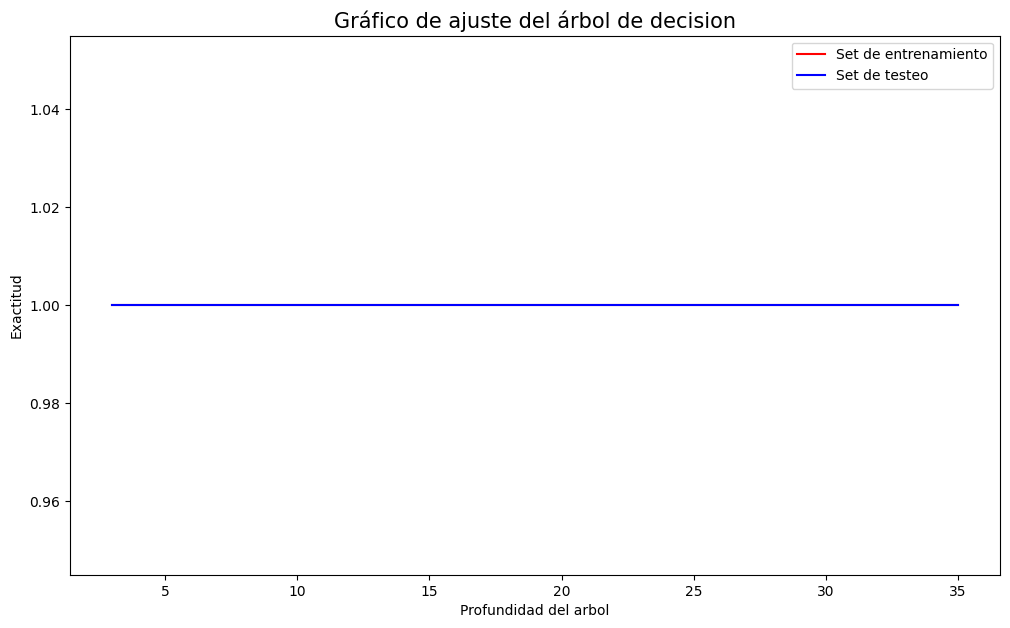

In [43]:
train_prec =  []
eval_prec = []
pred_prec=[]
max_deep_list = list(range(3, 36))

for deep in max_deep_list:
    arbol2 = DecisionTreeClassifier(max_depth=deep, criterion='entropy',class_weight={0:1,1:22})
    arbol2.fit(X_Train, y_Train)
    y_pre=arbol.predict(X_Test)
    train_prec.append(arbol2.score(X_Train, y_Train))
    eval_prec.append(arbol2.score(X_Test, y_Test))
    pred_prec.append(arbol2.score(X_Test, y_pre))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
#plt.plot(max_deep_list, pred_prec, color='g', label='Set de prediccion')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad del arbol')
plt.show()

In [47]:
#vemos cual de las profundidades hace que el f score de las hospitalizaciones mejore, el maximo f score 
#se da en la produndidad 4,10
depth_range= range(4,10)
for depth in depth_range:
    #arbol= DecisionTreeClassifier(max_depth = depth, random_state = 42, class_weight={0:1,1:22})
    arbol= DecisionTreeClassifier(max_depth = depth, random_state = 42)
    arbol_hospital=arbol.fit(X_Train,y_Train)
    y_predict=arbol.predict(X_Test)
    #plt.figure(figsize = (10,7))
    #tree.plot_tree(arbol_hospital, filled=True)
    print(classification_report(y_Test, y_predict))
    print('Exactitud en el set de entrenamiento: {0: .2f}'.format(arbol.score(X_Train, y_Train)))
    print('Exactitud en el set de testeo: {0: .2f}'.format(arbol.score(X_Test, y_Test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00        11

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272

Exactitud en el set de entrenamiento:  1.00
Exactitud en el set de testeo:  1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00        11

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272

Exactitud en el set de entrenamiento:  1.00
Exactitud en el set de testeo:  1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00        11

    accuracy        

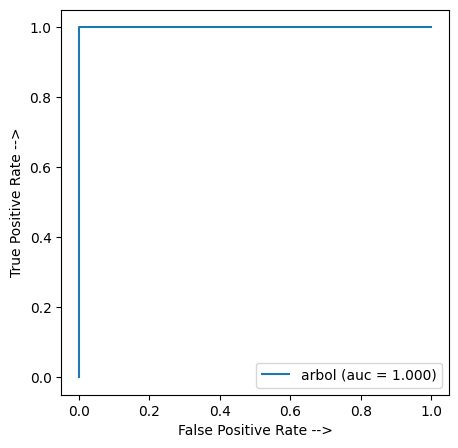

In [48]:
#GRAFICO LA CURVA ROC
from sklearn.metrics import roc_curve, auc
arbol_fp, arbol_tp, threshold = roc_curve(y_Test,y_predict)
auc_arbol=auc(arbol_fp, arbol_tp)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(arbol_fp, arbol_tp, linestyle='-',label='arbol (auc = %0.3f)' % auc_arbol)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()


Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

kvecinos= KNeighborsClassifier(n_neighbors=100)
# Entrenamos

kvecinos.fit(X_Train,y_Train)
y_pred = kvecinos.predict(X_Test.values)


c:\Users\beren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test,y_pred))
print('Exactitud en el set de entrenamiento: {0: .2f}'.format(arbol.score(X_Train, y_Train)))
print('Exactitud en el set de testeo: {0: .2f}'.format(arbol.score(X_Test, y_Test)))

0.9595588235294118
Exactitud en el set de entrenamiento:  1.00
Exactitud en el set de testeo:  1.00


Encuentre el valor óptimo para k

In [51]:
for n in [1,5]:
    kvecinos= KNeighborsClassifier(n_neighbors=n)
    kvecinos.fit(X_Train,y_Train)
    y_pred = kvecinos.predict(X_Test.values)
    print(accuracy_score(y_Test,y_pred))
    print(classification_report(y_Test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00        11

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00        11

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272



c:\Users\beren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\beren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

El modelo de kvecinos no es conveniente pues el aunque se intento balancear el dataset con stratify al hacer la particion de grupos de entreaniemto y test, creo que seria mejor intentar este modelo con el dataset mas eqilibrado.